# Simple Convolution Network Theory Explanation
A convolutional Neural Network CNN is a type of deep learning model specifically designed for processing structured grid data, like images. CNNs are particularly effective for tasks like image classification, object detection, and facial recognition. Here's a detailed break down
1. Input Layer
2. Convolutional Layer
3. Activation Layer
4. Pooling Layer
5. Fully Connected FC layer
6. Output Layer


In [1]:
pip install tensorflow keras

# Here's a Python code to implement a simple CNN.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7419 - loss: 0.7076 - val_accuracy: 0.8664 - val_loss: 0.3731
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8777 - loss: 0.3336 - val_accuracy: 0.8897 - val_loss: 0.3083
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8983 - loss: 0.2810 - val_accuracy: 0.8896 - val_loss: 0.3045
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9097 - loss: 0.2457 - val_accuracy: 0.9013 - val_loss: 0.2718
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9192 - loss: 0.2183 - val_accuracy: 0.8941 - val_loss: 0.2949
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9267 - loss: 0.1962 - val_accuracy: 0.8940 - val_loss: 0.2900
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9339 - loss: 0.1787 - val_accuracy: 0.9066 - val_loss: 0.2654
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9390 -

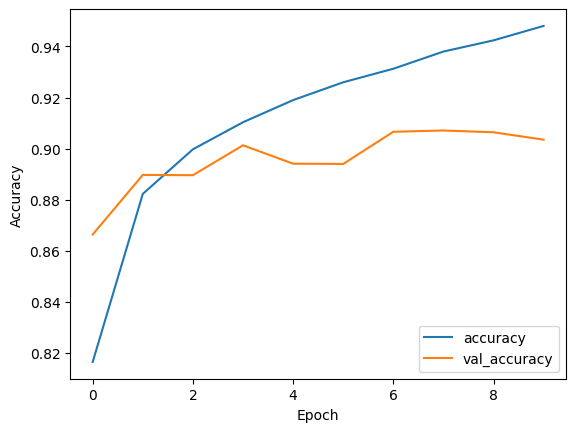

In [3]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the Fashion MNIST Dataset

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Preprocessing the data

train_images, test_images = train_images/ 255.0, test_images/ 255.0


# Reshape images to include the color channel (since Fashion MNIST is grayscale, the channel is 1)

train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

# Building the CNN Model

model = models.Sequential()


# Adding the first Convolution Layer


model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))


# Adding a second convolutional Layer

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))


# Adding a third Convolution Layer

model.add(layers.Conv2D(63, (3,3), activation = 'relu'))


# Flattening the feature maps to prepare for the fully connected layer

model.add(layers.Flatten())


# Adding a fully connected layer with 64 units

model.add(layers.Dense(64, activation = 'relu'))

# Adding the output layer with 10 units (for 10 classes in Fashion MNIST) and softmax activation function
model.add(layers.Dense(10, activation = 'softmax'))

# Compiling the model

model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Training the model

history = model.fit(train_images, train_labels, epochs =10, validation_data = (test_images, test_labels))

# Evaluating the model on the test data

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


# Plotting the accuracy and loss over epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.show()
